In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression as LR  # 线性回归
from sklearn.model_selection import train_test_split  # 划分训练测试集
from sklearn.cluster import KMeans
import geopandas as gpd



In [190]:
# 所有表格的结构
# 1. 读取数据
# acs_5yr = pd.read_csv('./acs_5yr_est_selected_economic_characteristics_2010-2022.csv')
# all_comm = pd.read_csv('./all_commodities.csv')
# all_stock = pd.read_csv('./all_stock_and_etfs.csv')
# storage = pd.read_csv('./Meat_Stats_Cold_Storage.csv')
# production = pd.read_csv('./Meat_Stats_Meat_Production.csv')
# counts = pd.read_csv('./Meat_Stats_Slaughter_Counts.csv')
# Meat_weights = pd.read_csv('./Meat_Stats_Slaughter_Weights.csv')
# nutrition = pd.read_csv('./Nutrition_Physical_Activity_and_Obesity_Data.csv')
# stock_des = pd.read_csv('./stock_descriptions.csv')
# tables = [acs_5yr, all_comm, all_stock, storage, production, counts, weights, nutrition, stock_des]
# acs_5yr['Label (Grouping)']

In [191]:
data = pd.read_csv("./adult_income_obesity.csv")

In [192]:
data = data.dropna(subset=['Median household income (dollars)'],axis = 0)

slope = 75.02659039411874  intercept = 37.67013822016381 coef = 0.22027086347698108
slope = 60.18053580218911  intercept = 28.78368347654187 coef = 0.19718148925729365
slope = 111.65074787852605  intercept = 28.94819208317111 coef = 0.1863677275719918
slope = 99.19118146095832  intercept = 37.26198397390241 coef = 0.2917742655393998
slope = 182.0440935608638  intercept = 33.58490625155379 coef = 0.3050203725321918
slope = 189.9593957695448  intercept = 31.6763622961176 coef = 0.2779334302282358
slope = 181.35118842215508  intercept = 24.947288345337675 coef = 0.17550799859195024
slope = 160.75301489909484  intercept = 26.454081067627733 coef = 0.19713421043495793
slope = 295.29205025698025  intercept = 31.128287723575493 coef = 0.33867570929148516
slope = 162.07744436750195  intercept = 39.45811076739465 coef = 0.2830260221116624
slope = 288.26296032835376  intercept = 36.29268598869989 coef = 0.3505527480885733
slope = -30.129351021040154  intercept = 28.67434943827055 coef = -0.12406

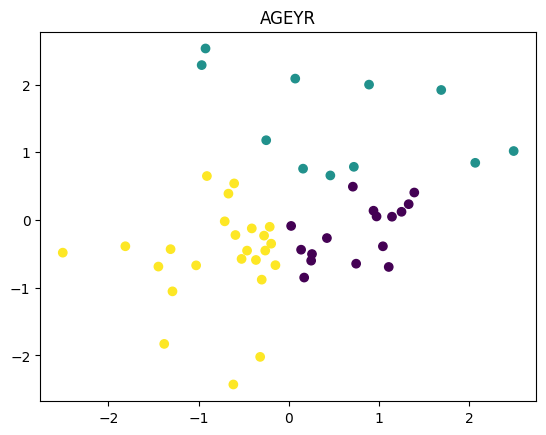

slope = 90.75582038875682  intercept = 40.1431337236177 coef = 0.34514783250581826
slope = 96.73511346477366  intercept = 31.700323264895957 coef = 0.44192238389403943
slope = 135.83290089108525  intercept = 30.570653441366673 coef = 0.3473397157853391
slope = 94.25432973247382  intercept = 37.53877504072567 coef = 0.4770684184588939
slope = 192.56522923299102  intercept = 34.99962861852761 coef = 0.49795688355815754
slope = 224.83271787341087  intercept = 32.815693538397205 coef = 0.5171596731045336
slope = 156.09553154234496  intercept = 25.73402932247061 coef = 0.23858098861248234
slope = 153.75813623435118  intercept = 27.86011966182526 coef = 0.30906089544603405
slope = 320.0966384880602  intercept = 31.25249968436627 coef = 0.5596752577541128
slope = 179.25617526520853  intercept = 41.19057638601143 coef = 0.5658631242634361
slope = 281.94943801675794  intercept = 36.851961795443 coef = 0.6012369111155522
slope = -65.46063946021265  intercept = 37.57329939351408 coef = -0.2330701

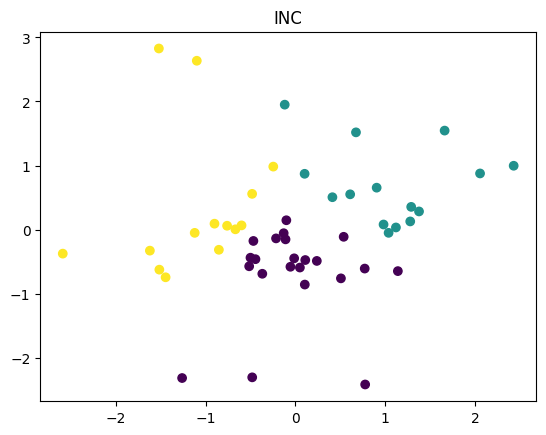

slope = 60.00650562903815  intercept = 35.983648950793764 coef = 0.24471648578195113
slope = 68.95942702722056  intercept = 30.34848923165168 coef = 0.2737700656508208
slope = 137.11337631479657  intercept = 29.548348505658584 coef = 0.31099880256062845
slope = 95.7054270054417  intercept = 37.294839845090905 coef = 0.3463258110610647
slope = 162.29942562842498  intercept = 34.012889031199876 coef = 0.4564174801227685
slope = 191.57283959866254  intercept = 32.3279933164562 coef = 0.4667416646157024
slope = 166.17801667285576  intercept = 25.47596660043736 coef = 0.21612480215248323
slope = 132.7314433408503  intercept = 27.977699329301267 coef = 0.2847458623939615
slope = 278.7054816590139  intercept = 31.14793989948611 coef = 0.5366505260591672
slope = 161.20373532523055  intercept = 39.931838372668366 coef = 0.5180086924462831
slope = 274.9130575523388  intercept = 36.063933802569714 coef = 0.7036079041521791
slope = -40.49859253364102  intercept = 35.09293721956236 coef = -0.129254

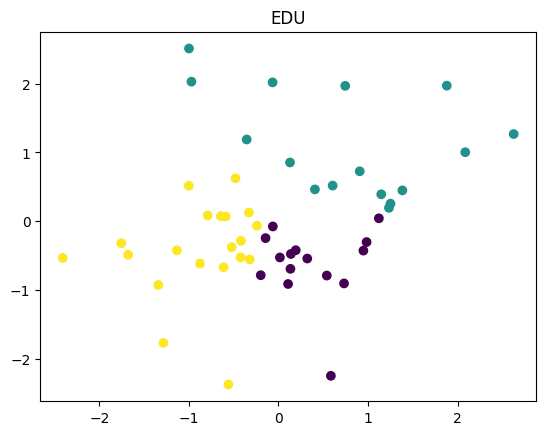

slope = 71.36565770575352  intercept = 37.539776726453084 coef = 0.6048997441183555
slope = 57.060453610252836  intercept = 29.238200533618095 coef = 0.8119958190156435
slope = 111.11608424378228  intercept = 29.563477711159965 coef = 0.8498527036462176
slope = 94.52137222377662  intercept = 37.09973015393972 coef = 0.7366000741334803
slope = 174.6718808033124  intercept = 34.08636709332914 coef = 0.7801446016235621
slope = 183.08077316990824  intercept = 32.04400812939685 coef = 0.7966580101897588
slope = 160.28318968664536  intercept = 25.39838441732817 coef = 0.4375349996467734
slope = 144.37362103876058  intercept = 27.583678721628047 coef = 0.5655535062546051
slope = 281.2572858531558  intercept = 31.354905492034757 coef = 0.8140149320494527
slope = 160.08642380673217  intercept = 39.68584148800873 coef = 0.8623946921351185
slope = 273.6572180647965  intercept = 36.63807248273042 coef = 0.9750179263473159
slope = -23.74408237803443  intercept = 26.95265125874886 coef = -0.65899281

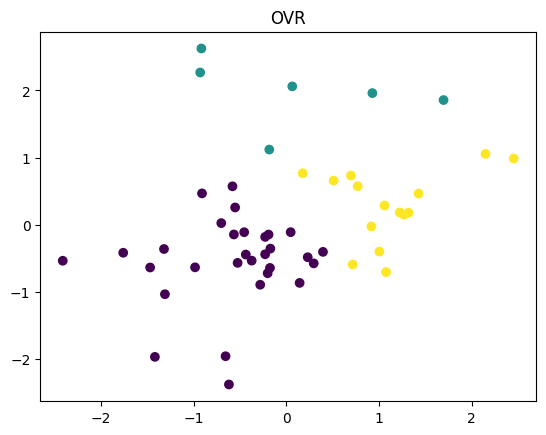

slope = 80.55961191390365  intercept = 38.90956179265632 coef = 0.23779047344631288
slope = 76.27076057891968  intercept = 31.153369530525364 coef = 0.15398979764206666
slope = 100.16116978069807  intercept = 27.713576813300605 coef = 0.10283802247193159
slope = 122.36037674678917  intercept = 42.25358678845418 coef = 0.32472221672103874
slope = 165.53843324187082  intercept = 32.914426395488825 coef = 0.1840486550488238
slope = 122.56172355425385  intercept = 33.366669655348105 coef = 0.12622854598603486
slope = 425.8704881035155  intercept = 18.824855995770076 coef = 0.30841842096870736
slope = 183.25112773904266  intercept = 27.218711864048593 coef = 0.2170696528759321
slope = 383.24693277694143  intercept = 29.568498600335243 coef = 0.28319718844972647
slope = 100.89304439698121  intercept = 36.75808300486534 coef = 0.1275974897492721
slope = 279.79221688359235  intercept = 38.78009291852553 coef = 0.4735079802265988
slope = -22.85237647861123  intercept = 23.75112229146128 coef = 

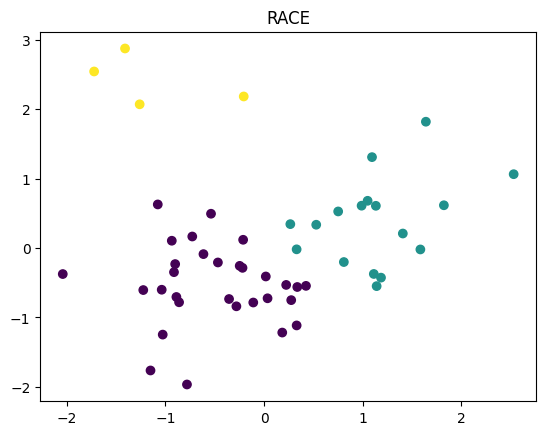

slope = 72.08432807413733  intercept = 37.599763529975064 coef = 0.5471472242054451
slope = 58.17808277302052  intercept = 29.24578619826268 coef = 0.7224034828795877
slope = 112.23701605284673  intercept = 29.532235435233655 coef = 0.7746911475066384
slope = 94.36769693507982  intercept = 37.074074951966736 coef = 0.6909478113941153
slope = 175.03198335064894  intercept = 34.0924298091189 coef = 0.7353501272716899
slope = 183.47934812358355  intercept = 32.03801421457908 coef = 0.7532821676328088
slope = 163.33106340656497  intercept = 25.330354515648974 coef = 0.4289017283912615
slope = 144.84789701792636  intercept = 27.57120781082685 coef = 0.48685275654916527
slope = 282.0827837336818  intercept = 31.352687123969094 coef = 0.7600560861769513
slope = 159.41223814522232  intercept = 39.65848238955715 coef = 0.8083465261900877
slope = 274.5206292871667  intercept = 36.64413333333575 coef = 0.9062675865430421
slope = -24.395821458805603  intercept = 26.91518226339806 coef = -0.1740673

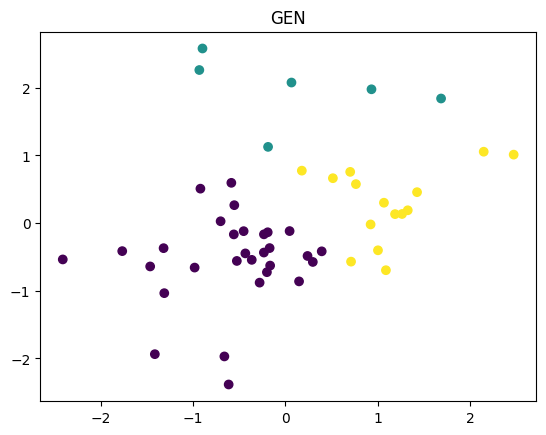

In [193]:
for id in data['adult_StratificationCategoryId1'].unique():
    beta_0, beta_1 = [], []
    data_id = data[data['adult_StratificationCategoryId1'] == id]
    for state in data_id["LocationDesc"].unique():
        if state == "National":
            continue
        # print(state)
        state_data = data_id[data_id["LocationDesc"] == state]
        x = state_data['Mean household income (dollars)'].str.replace(',', '').astype(int) / state_data[
            'Median household income (dollars)'].str.replace(',', '').astype(int)
        sub = (data['Mean household income (dollars)'].str.replace(',', '').astype(int) / data[
            'Median household income (dollars)'].str.replace(',', '').astype(int)).mean()
        std_div = (data['Mean household income (dollars)'].str.replace(',', '').astype(int) / data[
            'Median household income (dollars)'].str.replace(',', '').astype(int)).std()
        x = x - sub
        # print(sub)
        y = state_data['adult_obesity_Value'] 
        reg = LR().fit(x.values.reshape(-1, 1), y)
        beta_0.append(reg.intercept_)
        beta_1.append(reg.coef_[0])
        print('slope =', reg.coef_[0], ' intercept =', reg.intercept_, 'coef =', np.corrcoef(x, y)[0, 1])
        # print()
    state_list = data_id["LocationDesc"].unique()
    state_geo = data_id["geolocation"].unique()
    beta_0 = (beta_0 - np.mean(beta_0)) / np.std(beta_0)
    beta_1 = (beta_1 - np.mean(beta_1)) / np.std(beta_1)
    df = pd.DataFrame({'state': state_list, 'state_geo': state_geo, 'beta_0': beta_0, 'beta_1': beta_1})
    df.to_csv('state_regr_plot_data.csv')
    k_means = KMeans(n_clusters=3, random_state=0, max_iter=1000).fit(np.array([beta_0, beta_1]).T)
    plt.scatter(beta_0, beta_1, c=k_means.labels_)
    plt.title(id)
    plt.show()

In [194]:
# for id in data['adult_StratificationCategoryId1'].unique():
beta_0, beta_1,beta_2 = [], [],[]
# data_id = data[data['adult_StratificationCategoryId1'] == id]
for state in data["LocationDesc"].unique():
    if state == "National":
        continue
    # print(state)
    state_data = data_id[data_id["LocationDesc"] == state]
    x1 = state_data['Mean household income (dollars)'].str.replace(',', '').astype(int) / state_data[
        'Median household income (dollars)'].str.replace(',', '').astype(int)
    x2 = state_data['Mean household income (dollars)'].str.replace(',', '').astype(int)
    x = pd.DataFrame({'x1':x1.values,'x2':x2.values})
    y = state_data['adult_obesity_Value']/100
    reg = LR().fit(x.values.reshape(-1, 2), y)
    beta_0.append(reg.intercept_)
    beta_1.append(reg.coef_[0])
    beta_2.append(reg.coef_[1])
    print('slope =', reg.coef_[0], ' intercept =', reg.intercept_, 'coef01 =', np.corrcoef(x.x1, y)[0, 1],'coef02=',np.corrcoef(x.x2,y)[0,1], 'coef12=',np.corrcoef(x.x1,x.x2)[0,1])
    # print()
k_means = KMeans(n_clusters=3, random_state=0, max_iter=10000).fit(np.array([beta_0, beta_1,beta_2]).T)

from mpl_toolkits.mplot3d import Axes3D
# 假设你有beta_0, beta_1, beta_2这三个特征列表
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(beta_0, beta_1, beta_2,c=k_means.labels_)
ax.set_xlim([min(beta_0), max(beta_0)])
ax.set_ylim([min(beta_1), max(beta_1)])
ax.set_zlim([min(beta_2), max(beta_2)])
ax.view_init(elev=30, azim=90)
plt.show()

In [195]:
from scipy.spatial.distance import pdist, squareform

def is_coplanar(points, tolerance=10e-3):
    distances = pdist(points, metric='euclidean')
    gram_matrix = squareform(distances) ** 2
    determinant = np.linalg.det(gram_matrix)
    return abs(determinant) < tolerance

slope = 77.89174680653214  intercept = 38.34886831671371 coef = 0.2699253629540417
slope = 74.94496576236114  intercept = 30.449282688318476 coef = 0.22529235866398742
slope = 120.92427003382798  intercept = 29.309019993600817 coef = 0.1993671912184377
slope = 97.9740626805336  intercept = 37.89844142000163 coef = 0.34707650574688925
slope = 177.74588593641266  intercept = 33.92179103639349 coef = 0.30029227356464644
slope = 186.98130605838438  intercept = 32.47295849190961 coef = 0.30064963554014434
slope = 225.92324535228886  intercept = 23.85226780537809 coef = 0.2373035336563872
slope = 157.72255457897967  intercept = 27.31262723977921 coef = 0.24744921373345274
slope = 317.8165102686041  intercept = 30.835565854877096 coef = 0.371454184034337
slope = 151.4215597200165  intercept = 39.36940585676133 coef = 0.28964486747899276
slope = 280.5345667860552  intercept = 36.83680853021446 coef = 0.48442810201582237
slope = -40.825623859787136  intercept = 31.1740898985079 coef = -0.131000

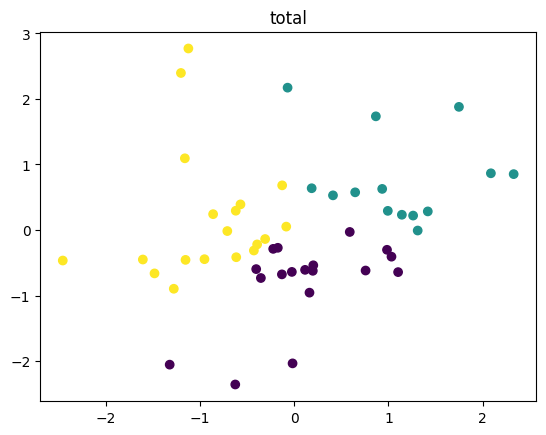

In [199]:

beta_0, beta_1 = [], []
data_id = data
for state in data_id["LocationDesc"].unique():
    if state == "National":
        continue
    # print(state)
    state_data = data_id[data_id["LocationDesc"] == state]
    x = state_data['Mean household income (dollars)'].str.replace(',', '').astype(int) / state_data[
        'Median household income (dollars)'].str.replace(',', '').astype(int)
    sub = (data['Mean household income (dollars)'].str.replace(',', '').astype(int) / data[
        'Median household income (dollars)'].str.replace(',', '').astype(int)).mean()
    std_div = (data['Mean household income (dollars)'].str.replace(',', '').astype(int) / data[
        'Median household income (dollars)'].str.replace(',', '').astype(int)).std()
    x = x - sub
    # print(sub)
    y = state_data['adult_obesity_Value'] 
    reg = LR().fit(x.values.reshape(-1, 1), y)
    beta_0.append(reg.intercept_)
    beta_1.append(reg.coef_[0])
    print('slope =', reg.coef_[0], ' intercept =', reg.intercept_, 'coef =', np.corrcoef(x, y)[0, 1])
    # print()
state_list = data_id["LocationDesc"].unique()
state_geo = data_id["geolocation"].unique()
beta_0 = (beta_0 - np.mean(beta_0)) / np.std(beta_0)
beta_1 = (beta_1 - np.mean(beta_1)) / np.std(beta_1)
df = pd.DataFrame({'state': state_list, 'state_geo': state_geo, 'beta_0': beta_0, 'beta_1': beta_1})
df.to_csv('state_regr_plot_data.csv')
k_means = KMeans(n_clusters=3, random_state=0, max_iter=1000).fit(np.array([beta_0, beta_1]).T)
plt.scatter(beta_0, beta_1, c=k_means.labels_)
plt.title('total')
plt.show()

         pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                       

/tmp/ipykernel_21299/1539713104.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


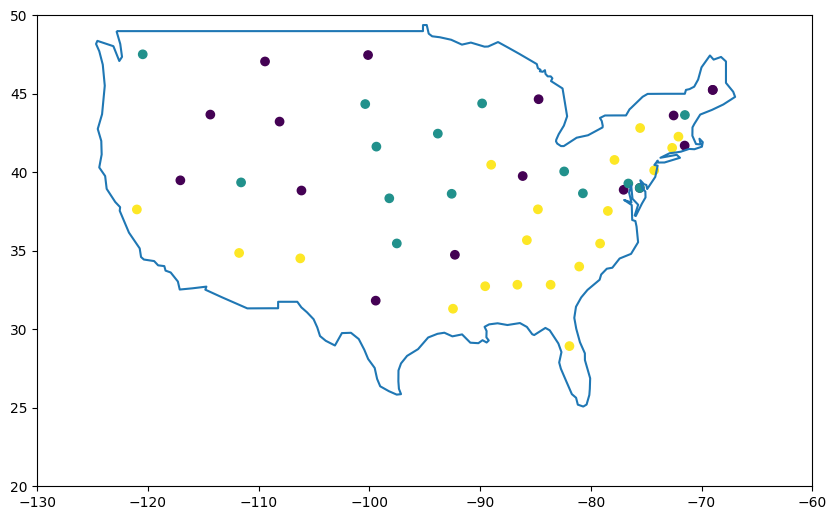

In [203]:
usa = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
print(usa)
states = usa[usa['iso_a3']=='USA']
print(usa)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
states.boundary.plot(ax=ax)
x, y = zip(*[[float(x) for x in y] for y in df['state_geo'].apply(lambda x: x[1:-1].split(','))])
plt.scatter(y,x, c=k_means.labels_)
plt.xlim(-130, -60)
plt.ylim(20, 50)
plt.show()

In [197]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy())

TypeError: points_from_xy() missing 2 required positional arguments: 'x' and 'y'

In [ ]:
gdf.plot(column='beta_0', cmap='coolwarm', legend=True)
plt.show()
